## Procedural to Object Approach

### Procedural Stack

A stack is a structure developed to store data in a very specific way. Imagine a stack of coins. 

* You aren't able to put a **coin anywhere else but on the top of the stack.**
* You can't get a coin off the stack from any place **other than the top of the stack.**
* If you want to get the coin **that lies on the bottom, you have to remove all the coins from the higher levels.**

<br> This is called LIFO (Last in First Out)

<div>
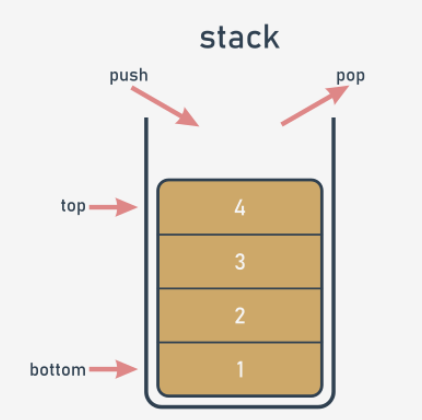
</div>

There are 2 operations:

* Push - when a new element is put on the top
* Pull - when an existing element is taken away from the top

In [1]:
stack = []

def push(val):
    stack.append(val)
def pop(): #  function doesn't check if there is any element in the stack.
    val = stack[-1]
    del stack[-1]
    return val

push(3)
push(2)
push(1)

print(pop())
print(pop())
print(pop())

1
2
3


Disadvantages of this approach:

* **stack[0]** is an essential variable which is highly vulnerable: **anyone can modify it in an uncontrollable way** could be malicious or carlessness (Ex: stack[0]=0)

* Also if you want **more than 1 stack later** you will have to create another list for the new stacks storage and new push and pop functions as well.

### How Object Oriented Approach can solve this:

* **Encapsulation:** ability to hide selected values against unauthorised access. They can neither be accessed nor be modified if you want to use them exclusively. 


* **Class:** When you have 1 class with properties of stack you can use that as a blueprint and **produce as many stacks as you want, you dont need to copy or replicate any part of the code. **



* **Inheritance:** ability to enrich the stack with new functions. `you can create a new class which inherits all the exsisting traits from the superclass and then adds new ones.`

#### Implementation

* We want the class to have 1 property as **stack storage**, we need **a list inside each object of the class**, each object needs to have its own list and `it must not be shared`.


* We want the list to be **hidden** from the class user's sight.
<br>

All these properties have to be added manually to the class in python.

<br>

* **`Constructor`:** It is a function `which constructs new objects`, it should know everything about the objects structure, and must perform all the needed initializations. 

**The part of the Python class responsible for creating new objects is called the constructor, and it's implemented as a method of the name `__init__`.**

<br>

There is no trace of invoking the constructor inside the code. It has been invoked implicitly and automatically

* **`self`**: Each class method declaration must contain at least one parameter (always the first one) usually referred to as self, and is used by the objects to identify themselves.

In [ ]:
class Stack:  # Defining the Stack class.
    def __init__(self):  # Defining the constructor function.
        print("Hi!")


stack_object = Stack()  # Instantiating the object.


**Adding Properties to Constructor**
<br>
* Any change you make **inside the constructor that modifies the state of the `self` parameter** will be reflected in the newly created object.


* `Dotted notation`, just like when invoking methods (which uses () too); this is the general convention for accessing an object's properties.


* If you set a property's value for the very first time (like in the constructor), you are creating it; from that moment on


* In the below example the `variable is NOT hidden.`








In [3]:
class Stack:
    def __init__(self):
        self.stack_list = []


stack_obj = Stack()
print(len(stack_obj.stack_list))


0


**To HIDE that variable use `__` 2 underscores**: Name starting with two underscores (__), it becomes private

In [4]:
 class Stack:
    def __init__(self):
        self.__stack_list = []


stack_object = Stack()
print(len(stack_object.__stack_list)) # Raises AttributeError 


AttributeError: 'Stack' object has no attribute '__stack_list'

In [8]:
class Stack_Ak:
    def __init__(self):
        self.__stack_ls=[]
        
    def push(self,val):
        self.__stack_ls.append(val)
        
    def pop(self):
        val = self.__stack_ls[-1]
        del self.__stack_ls[-1]
        return val
    
stack_obj=Stack_Ak() # Remember this

stack_obj.push(3)
stack_obj.push(2)
stack_obj.push(1)

print(stack_obj.pop())
print(stack_obj.pop())
print(stack_obj.pop())

1
2
3


**To have multiple stacks**

In [9]:
class Stack_Ak:
    def __init__(self):
        self.__stack_ls=[]
        
    def push(self,val):
        self.__stack_ls.append(val)
        
    def pop(self):
        val = self.__stack_ls[-1]
        del self.__stack_ls[-1]
        return val
    
stack_1=Stack_Ak() # Remember this
stack_2=Stack_Ak() # Remember this


stack_1.push(3)              # Pushing 3 in S1
stack_2.push(stack_1.pop())   # Pulling out 3 from S1 and pushing in S2

print(stack_2.pop())  # popping out the S2

3


#### Class on Class Action

* We can add another `class` which can operate on a `class`.
<br>

**Define a new subclass pointing to the class which will be used as the superclass.**

* We want the new stack to get all components from its `superclass` 

* We want the `push` to push the value on to the stack and add that value to the `sum` variable.

* We want the `pop` to pop the value off the stack and then substract the value form the `sum` variable.

In [12]:
class Stack_Ak:
    def __init__(self):
        self.__stack_ls=[]
        
    def push(self,val):
        self.__stack_ls.append(val)
        
    def pop(self):
        val = self.__stack_ls[-1]
        del self.__stack_ls[-1]
        return val
    
class ADD_Stack_Ak:
    def __init__(self):
        Stack_Ak.__init__(self)
        self.__sum=0
        
    def push(self, val):    # New implementation of push
        self.__sum += val
        Stack_Ak.push(self, val)  # invoking the PREVIOUS IMPLEMENTATION 
        
    def pop(self):
        val = Stack_Ak.pop(self)  #  invoking the PREVIOUS IMPLEMENTATION 
        self.__sum -= val
        return val

* Here `sum` is a **private variable** which will store all the summations.


* `Stack_Ak.__init__(self)` Python forces you to **explicitity invoke the constructor of the superclass**   `<super_class>.<name_of_constructor_to_invoke>(self)`


* `self` : points to the object which is the class's instance which has to be initialised by the constructor, when WITHIN CLASS invoking the constructor method **demands usage of `self`**


* **Invoking any method (including constructors) OUTSIDE the CLASS** never requires using `self` as an argument.



* Now inorder to add in the sub-class we need to **modify** the `push and pop methods of the super class`.



* Also **we are invoking the PREVIOUS IMPLEMENTATION of the `push and pop` method in the superclass**

* `__sum` is a private variable we need a **NEW METHOD** to return the __sum value
<br>

**A class method is actually a function declared inside the class and able to access all the class's components.**



In [15]:
class Stack_Ak:
    def __init__(self):
        self.__stack_ls=[]
        
    def push(self,val):
        self.__stack_ls.append(val)
        
    def pop(self):
        val = self.__stack_ls[-1]
        del self.__stack_ls[-1]
        return val
    
class ADD_Stack_Ak:
    def __init__(self):
        Stack_Ak.__init__(self)
        self.__sum=0
        
    def push(self, val):    # New implementation of push
        self.__sum += val
        Stack_Ak.push(self, val)  # invoking the PREVIOUS IMPLEMENTATION 
        
    def pop(self):
        val = Stack_Ak.pop(self)  #  invoking the PREVIOUS IMPLEMENTATION 
        self.__sum -= val
        return val
    
    def get_sum(self):
        return self.__sum

stack_add = AddingStack()

for i in range(5):
    stack_add.push(i)
print(stack_add.get_sum())

for i in range(5):
    print(stack_add.pop())

10
4
3
2
1
0


**Define a new exception named `QueueError` (choose an exception to derive it from) and raise it when get() tries to operate on an empty list.**

<br>

Below is FIFO

In [27]:
class QueueError(IndexError):  # Choose base class for the new exception.
    pass

class Queue:
    def __init__(self):
        self.__queue=[]
    
    def put(self, elem):
        self.__queue.append(elem)

    def get(self):
        if len(self.__queue) > 0:
            val = self.__queue[0]
            del self.__queue[0]
            return val
        else:
            raise QueueError

que = Queue()
que.put(1)
que.put("dog")
que.put(False)
try:
    for i in range(4):
        print(que.get())
except:
    print("Queue error")


1
dog
False
Queue error
